In [1]:
import numpy as np

from sklearn.datasets import load_boston
from numpy import *
import matplotlib.pyplot as plt 
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import preprocessing

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px

data = pd.read_csv('data-annee.csv')
df = pd.DataFrame(data, columns=['Date/Time',
                                 'TZ1 WORK:Zone People Occupant Count [](TimeStep)',
                                 'TZ2 MISC:Zone People Occupant Count [](TimeStep)',
                                 'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',
                                 'TZ1 WORK:Zone Air Temperature [C](TimeStep)',
                                 'TZ2 MISC:Zone Air Temperature [C](TimeStep)',
                                 'TZ1 WORK:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)',
                                 'TZ2 MISC:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)',
                                 'Electricity:Facility [J](TimeStep) '])

X = df[['Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',
        'TZ1 WORK:Zone People Occupant Count [](TimeStep)',
        'TZ2 MISC:Zone People Occupant Count [](TimeStep)',
        'TZ1 WORK:Zone Air Temperature [C](TimeStep)',
        'TZ2 MISC:Zone Air Temperature [C](TimeStep)',
        'TZ1 WORK:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)',
        'TZ2 MISC:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)']]
Y = df[['Electricity:Facility [J](TimeStep) ', ]]

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X_train.head(2))                                              # Standardizing Data 
print(X_train.head(2))

(23476, 7)
(11564, 7)
(23476, 1)
(11564, 1)
       Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)  \
22401                                               19.5                
14588                                               14.0                

       TZ1 WORK:Zone People Occupant Count [](TimeStep)  \
22401                                         38.750078   
14588                                          0.000000   

       TZ2 MISC:Zone People Occupant Count [](TimeStep)  \
22401                                               0.0   
14588                                               0.0   

       TZ1 WORK:Zone Air Temperature [C](TimeStep)  \
22401                                    23.347856   
14588                                    15.940416   

       TZ2 MISC:Zone Air Temperature [C](TimeStep)  \
22401                                    20.397822   
14588                                    15.876600   

       TZ1 WORK:Zone Thermostat Heating Setpoint Tempe

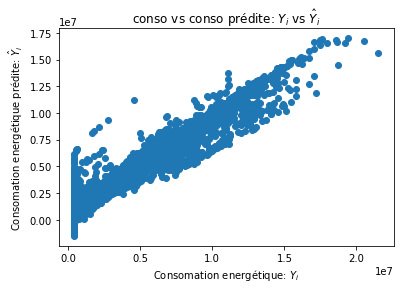

In [3]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

lm = LinearRegression()
lm.fit(X_train, Y_train)
y_pred_from_sklearn = lm.predict(X_test)

plt.scatter(Y_test, y_pred_from_sklearn)
plt.xlabel("Consomation energétique: $Y_i$")
plt.ylabel("Consomation energétique prédite: $\hat{Y}_i$")
plt.title("conso vs conso prédite: $Y_i$ vs $\hat{Y}_i$")
plt.show()

In [4]:
print('Intercept: \n', lm.intercept_)
print('Coefficients: \n',lm.coef_)

Intercept: 
 [-4475776.11033784]
Coefficients: 
 [[-661849.38292485  -73384.58954216  -11221.01554601  556673.26871485
   277013.24859636   70855.67897109    8054.86965564]]


In [5]:
data2 = pd.read_csv('datateste.csv')

df2 = pd.DataFrame(data2, columns=['Date/Time',
                                  'Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',
                                  'TZ1 WORK:Zone People Occupant Count [](TimeStep)',
                                  'TZ2 MISC:Zone People Occupant Count [](TimeStep)',
                                  'TZ1 WORK:Zone Air Temperature [C](TimeStep)',
                                  'TZ2 MISC:Zone Air Temperature [C](TimeStep)',
                                  'TZ1 WORK:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)',
                                  'TZ2 MISC:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)',
                                  'Electricity:Facility [J](TimeStep) '])
X2 = df2[['Environment:Site Outdoor Air Drybulb Temperature [C](TimeStep)',
        'TZ1 WORK:Zone People Occupant Count [](TimeStep)',
        'TZ2 MISC:Zone People Occupant Count [](TimeStep)',
        'TZ1 WORK:Zone Air Temperature [C](TimeStep)',
        'TZ2 MISC:Zone Air Temperature [C](TimeStep)',
        'TZ1 WORK:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)',
        'TZ2 MISC:Zone Thermostat Heating Setpoint Temperature [C](TimeStep)']]
y_test = df2['Electricity:Facility [J](TimeStep) ']

In [6]:
predictions_sklearn = lm.predict(X2)
print(predictions_sklearn)


[[ 4.24183477e+05]
 [ 7.06002317e+05]
 [ 8.92226232e+05]
 [ 1.23043064e+06]
 [ 8.94488747e+05]
 [ 6.67093440e+05]
 [ 4.87415566e+05]
 [ 3.21401994e+05]
 [ 2.22065966e+05]
 [ 1.33081672e+05]
 [ 5.50470860e+04]
 [-1.61966727e+04]
 [-3.90940335e+04]
 [-7.42253009e+04]
 [-1.10607099e+05]
 [-1.44654014e+05]
 [-1.33295646e+05]
 [-1.37427443e+05]
 [-1.45634003e+05]
 [-1.53556811e+05]
 [-1.61643973e+05]
 [-1.70522029e+05]
 [-1.80023609e+05]
 [-1.89801689e+05]
 [-8.34360313e+04]
 [-1.01731384e+04]
 [ 5.21809741e+06]
 [ 6.45658422e+06]
 [ 7.15149427e+06]
 [ 7.53943883e+06]
 [ 7.09417884e+06]
 [ 7.17143829e+06]
 [ 6.50042527e+06]
 [ 6.54761745e+06]
 [ 6.58499635e+06]
 [ 6.61756503e+06]
 [ 5.23920410e+06]
 [ 5.26239171e+06]
 [ 5.28095503e+06]
 [ 5.29464557e+06]
 [ 5.27603248e+06]
 [ 5.25835973e+06]
 [ 5.23993402e+06]
 [ 5.22021394e+06]
 [ 5.19948012e+06]
 [ 5.17806004e+06]
 [ 5.15605826e+06]
 [ 5.13353042e+06]
 [ 7.82333314e+06]
 [ 8.36175032e+06]
 [ 8.43592699e+06]
 [ 8.41342205e+06]
 [ 8.3973905

In [7]:

fig3 = px.line(df2, x = 'Date/Time', y = predictions_sklearn, title='prédiction de la consomation énergetique')
fig3.add_scatter(x=df2['Date/Time'], y=y_test, mode='lines')
fig3.show()


ValueError: All arguments should have the same length. The length of argument `wide_variable_0` is 1, whereas the length of  previously-processed arguments ['Date/Time'] is 672

In [ ]:
print(len(predictions_sklearn))
print(len(df2['Date/Time']))
print(len(df2['Electricity:Facility [J](TimeStep) '],))

In [ ]:
from sklearn.metrics import mean_squared_error
from prettytable import PrettyTable
MSE_sk = mean_squared_error(Y_test, y_pred_from_sklearn)
#MSE_sklearn_LR_Model = mean_squared_error(y_test, predictions_stat)
x = PrettyTable(['Models', 'MSE'])

x.add_row(['Linear Regression (SKLEARN)', MSE_sk])
#x.add_row(['Linear Regression (From Scratch)', MSE_custom_LR_Model])
print(x)

In [ ]:

X_train_standardized = (X_train - X_train .mean()) / X_train.std()
X_test_standardized  = (X_test - X_train.mean()) /  X_train.std()

print(X_train_standardized)
print(X_test_standardized )

In [ ]:

def error_function(y_actual,y_predicted):
    error = 0
    print('its okay')
    for i in range(0,len(y_actual)):
        error =  error + pow((y_actual[i] - y_predicted[i]),2)
        return error/(2*len(y_actual))

def y_predicted(w,x):
    y_pred = np.zeros(len(x))
    for i in range(0,len(x)):
        for j in range(0,len(w)):
            y_pred[i] = y_pred[i]+(w[j]*x[i][j] + w[-1])
            
    return y_pred

def gradient_descent(y_actual,y_pred,x):
    grad = np.zeros(x.shape[1])
    for i in range(x.shape[1]):
        for j in range(0,len(y_actual)):
            grad[i] = - (y_actual[j] - y_pred[j])*x[j][i] + grad[i]
    return grad/len(y_actual)


def weights(x_train,y_train,num_iterations,learning_rate):
    no_of_rows = x_train.shape[0]
    print(no_of_rows)
    no_of_columns = x_train.shape[1]
    print(no_of_columns)
    new_x_train = np.ones((no_of_rows,no_of_columns+1))
    print(new_x_train)
    new_x_train[:,0:no_of_columns] = x_train
    print(new_x_train)
    w = np.zeros(no_of_columns)
    w =np.append(w,1)
    print(w)
    for i in range(0,num_iterations):
        y_pred = y_predicted(w,new_x_train)
        error = error_function(y_train,y_pred)
        print("mean square error: ",error,"after",i,"th iteration")
        MSE_points.append(error)
        grad = gradient_descent(y_train,y_pred,new_x_train)
        w = w - learning_rate*grad
        learning_rate = learning_rate/1.05                                # Learning rate Decay 
    return w

def regression_test(x_test,w):
    row = x_test.shape[0]
    column = x_test.shape[1]
    new_x_test = np.ones((row,column+1))
    new_x_test[:,0:column] = x_test
    y_pred = y_predicted(w,new_x_test)
    return(y_pred)



In [ ]:
MSE_points = []
num_iterations = 300
learning_rate = 0.1
w = weights(X_train_standardized,Y_train,num_iterations,learning_rate)
Y_pred = regression_test(X_test_standardized,w)
error_function(Y_test,Y_pred)

